<a href="https://colab.research.google.com/github/android-kunjapppan/Fast-AI/blob/master/FastAi_Lec2_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from fastai2.vision.all import *

* Classification is predicting from a number of discrete possibilities.
* Regression is predicting one or more numeric quantities.





* If you train your model for too long, with not enough data,you will see the accuracy of your model start to get worse, this is **Overfitting**


```cnn_learner(dls,resnet34,metrics```
* A learner is the thing that tries to figure out what are the parameters which best cause the function(resnet34) to match the labels in the data(dls)


# Metrics

* A metric is a function that measures quality of the model's predicitons using the validation set.
    Acc = 1- error_rate

* Loss necessarily could be same as your metric.
* Loss is measurement of performance to decide how to update your parameters.
 
 ---

* Error is just one kind of metric. it's athing which measures How well you're Doing.
* Loss is some measure of performance we can look at: when we adjust our parameters up or down and does that measure of performance get better or worse?
* If you change paramters a bit,, the loss changes a bit.

#**Overfitting** 
Results when our model is "Cheating". Our model learns nothing from the data, but memorizes the data.
* We measure overfitting by looking at the metrics on the validation set.
* Spliiting off our validation data means over model never sees it in training.
* Your metric getting worse, not your loss Function getting worse.
 



# Transfer Learning:
Using a pretrained model for a task different to what it was originally trained for.

    learn.fine_tine(1)
* Fine_Tune is what we do when we are transfer Learning. 
* You can start with those weights in yout model and then train some more epochs on your data and you'll end up with a far far more accurate model than if you didnt start with a pre-trained model.
* TL is most imp thing to use less data and less compute power.

---

# Fine Tuning:
* A transfer Learning technique where the weights of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.

1. Use one epoch to fit those parts of the model necessary to get the new random head to work correctly with your dataset.
2. Use the number of epochs requested when calling the method to fit the entire model, updating the weights faster than the earlier layers.



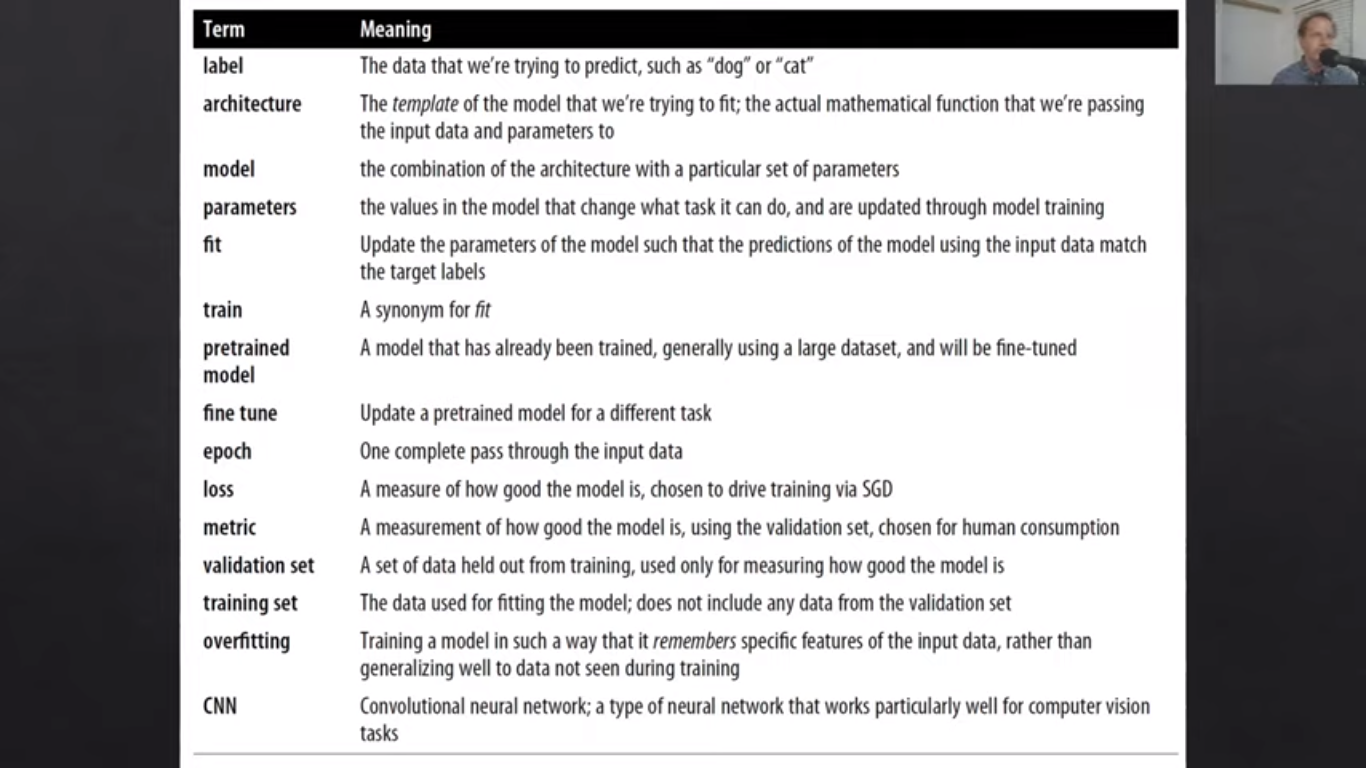

In [6]:
img = PILImage.create('/content/drive/My Drive/Screenshot (2).png')
img

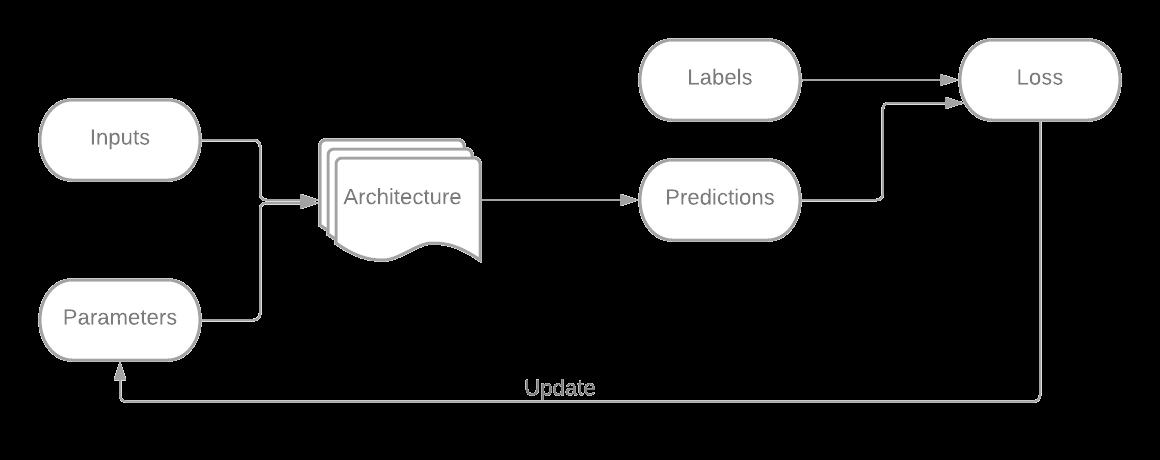

In [7]:
img2 = PILImage.create('/content/NN.png')
img2

# Differnce btwn paremeters and hyperparameters. -- 
* **Parameters** are the things which change what the model does, what the architecture does.
* **Hyperparameters** are the choices about what numbers do you actually pass to the actual fitting function to decide how te fitting process happens.

# Production:

# The state of Deep Learning:

* Vision
* Text
* tabular
* Reccommendation sys
* Multi Model
* other  (NLP, Protein)

# How might we Decide if there's a relationship?

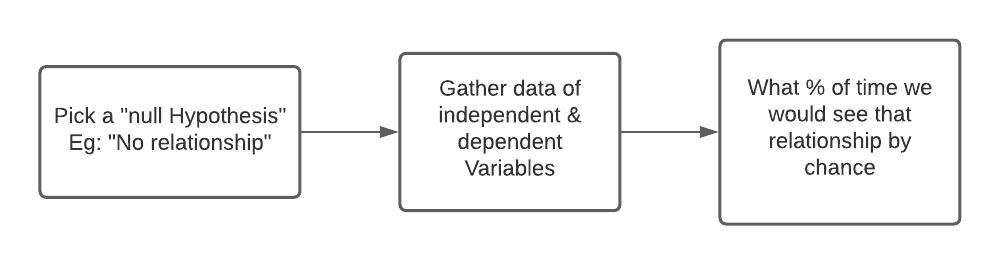

In [10]:
img3 = PILImage.create('/content/NN (1).png')
img3

# how can we calucate this % ??

* Generate random Data->Repeat N times->Calculate % (#slope<0.0332)''')

# P- value:
The Probability of an observed(or more extreme) result assuming that null hypothesis is True
**Null Hypothesis Significance Testing never worked**

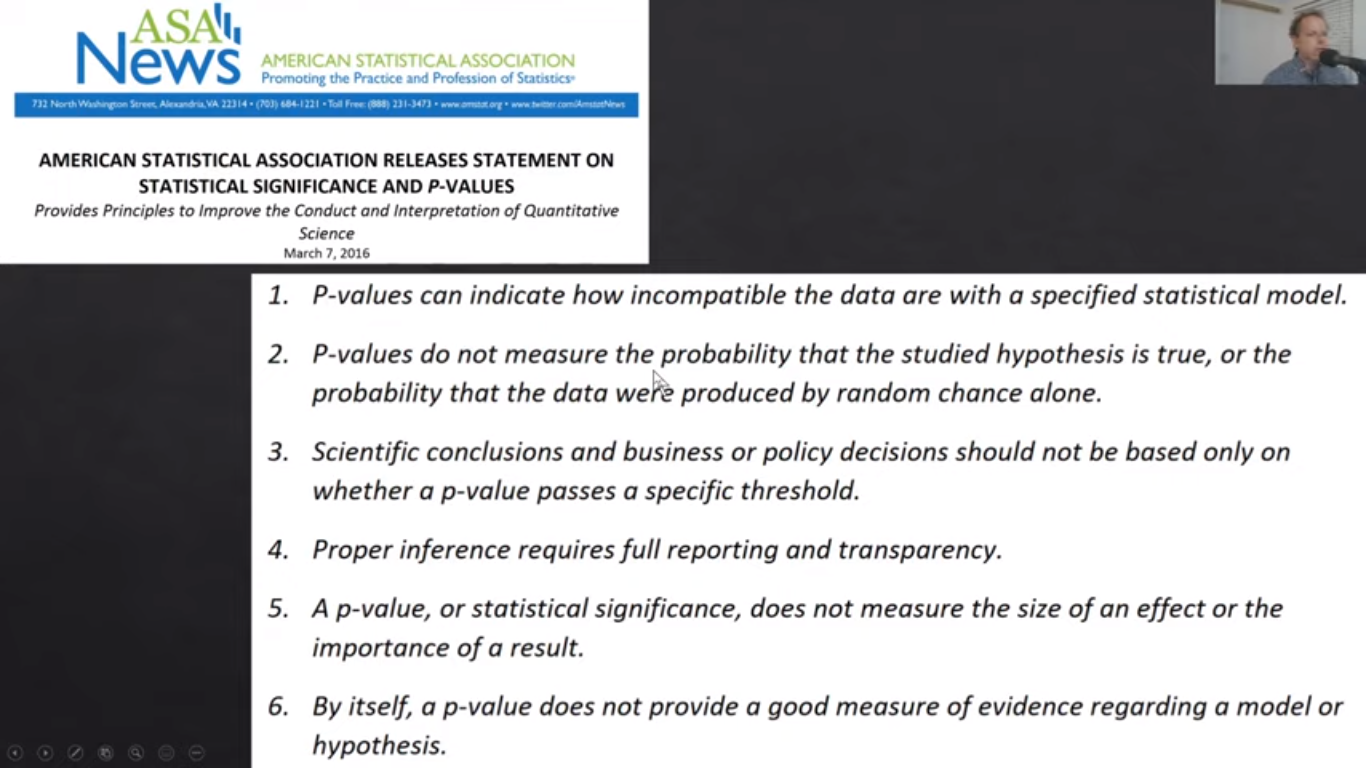

In [13]:
img4 = PILImage.create('/content/Screenshot (3).png')
img4

# Designing Products:
1. Defined Objective
2. Levers(what inputs can we control)
3. Data(what data can we collect)
4. Models(how levelers influence the objective)

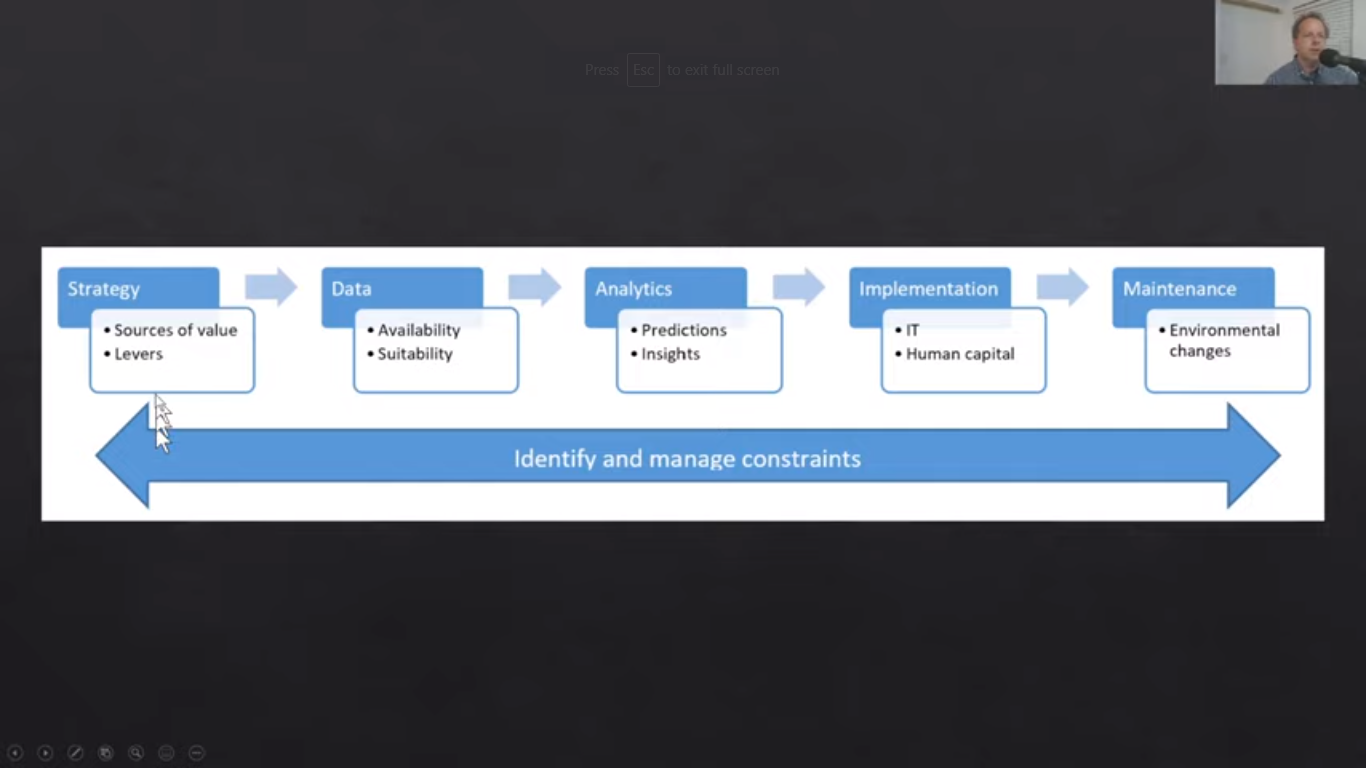

In [14]:
img5 = PILImage.create('/content/Screenshot (4).png')
img5

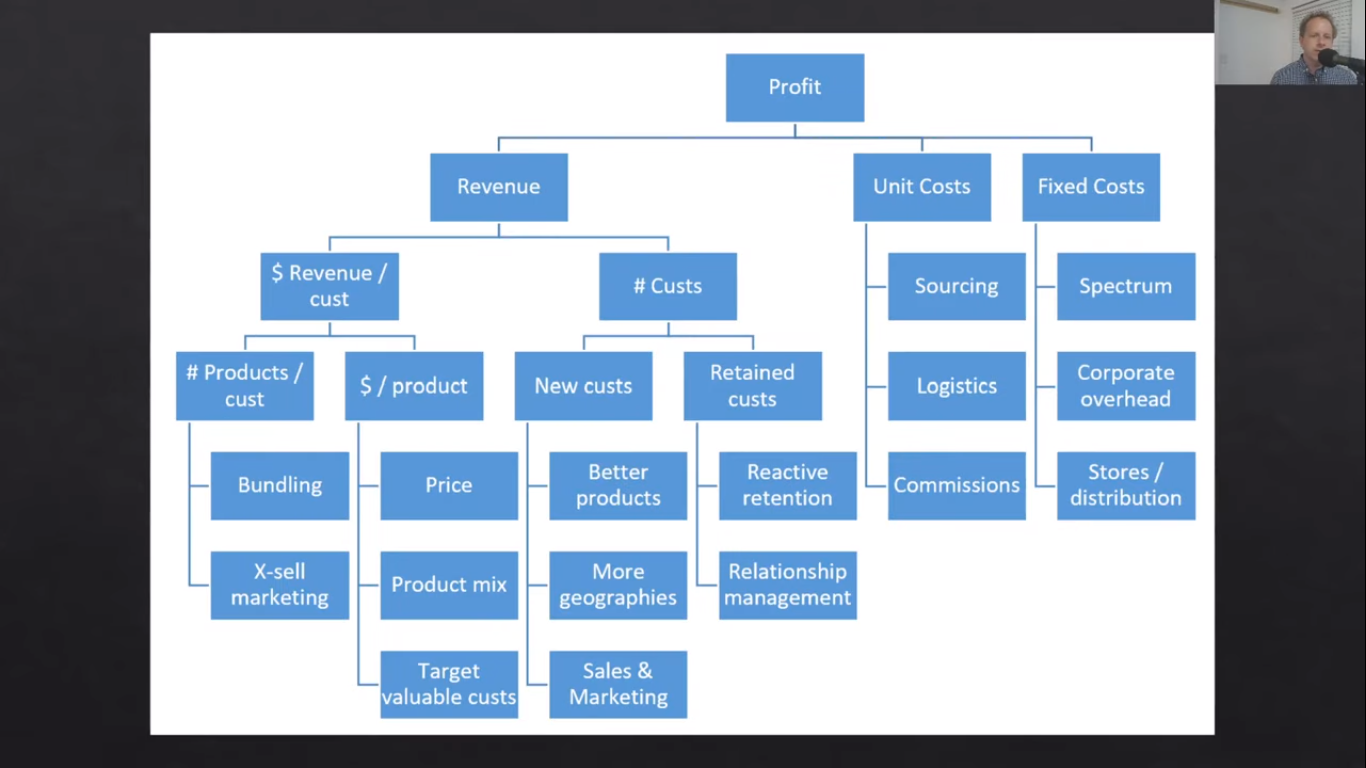

In [15]:
img6 = PILImage.create('/content/Screenshot (5).png')
img6

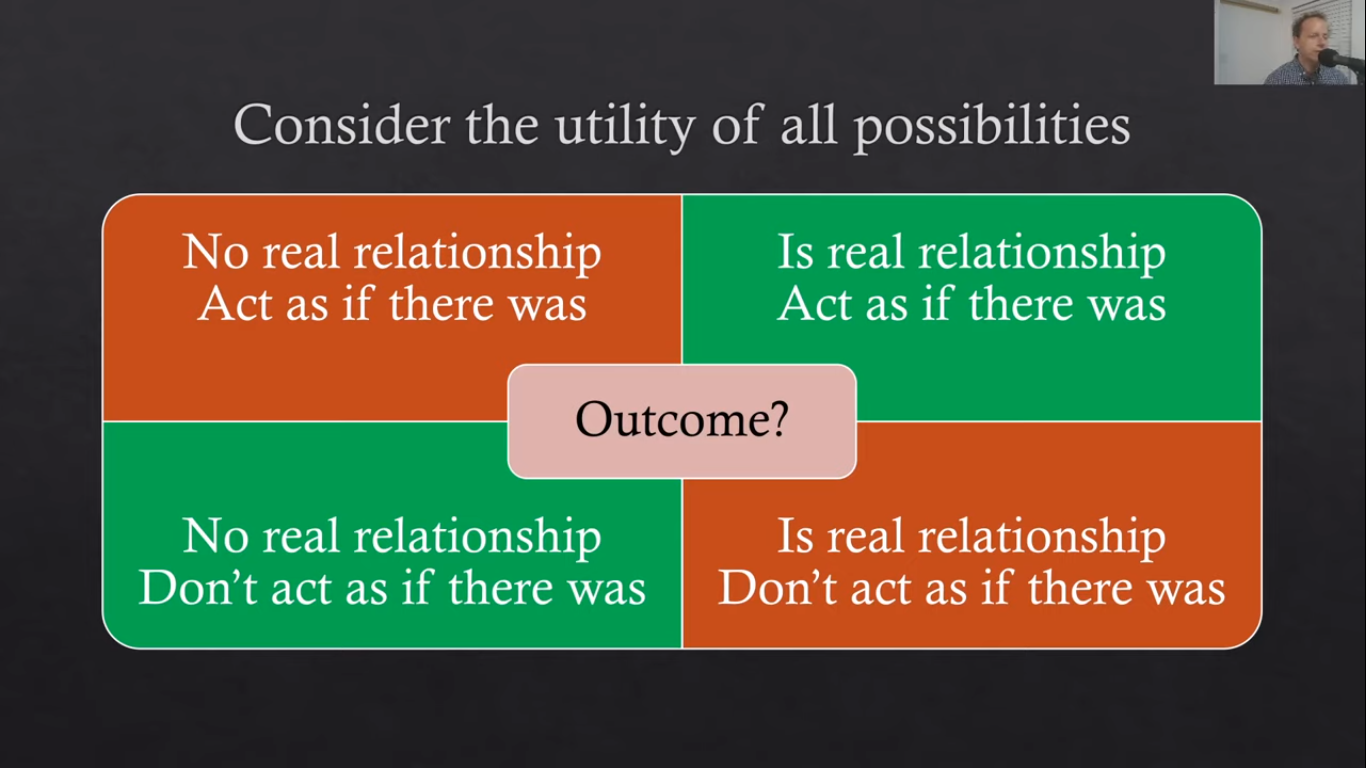

In [17]:
img7 = PILImage.create('/content/Screenshot (6).png')
img7

# Creating a Image Dataset using Bing Image Search API

In [18]:
key = 'XXX'

In [ ]:
search_images_bing

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

In [ ]:
dest = 'images/grizzly.jpg'
download_url(ims[0],dest)

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

In [ ]:
failed = verify_images(fns)
failed

In [ ]:
failed.map(Path.unlink);

# from data to DataLoaders

In [ ]:
bears = DataLoader(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct =0.3,seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

* `DataLoader` grabs few images at a time and puts them in a batch
* A `DataLoaders` includes validation adn traning `DataLoader`s

In [ ]:
dls = bears.dataloaders(path)

In [ ]:
dls.valid.show_batch(max_n= 4,nrows=1)

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

# Data Augmentation

# training

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

# Tuning your model into online application

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts = '.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')

In [ ]:
learn_inf.dls.vocab

# Creating a Notebook App from the Model